<a href="https://colab.research.google.com/github/Bolorooo24/CV-ML_labs/blob/main/Pytorch-deep-learning/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network classification with PyTorch
Classification is a problem of predicting whether something is one thing or another.

Book version - https://www.learnpytorch.io/02_pytorch_classification/

All the resources are here - https://github.com/mrdbourke/pytorch-deep-learning/tree/main/video_notebooks

## 1. Make classification data and get it ready

In [ ]:
import sklearn
from sklearn.datasets import make_circles

In [ ]:
# make 1000 samples
n_samples = 1000

# create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"first 5 samples of x: {X[:5]}")
print(f"first 5 samples of y: {y[:5]}")

first 5 samples of x: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples of y: [1 1 1 1 0]


In [ ]:
# Make dataframe of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


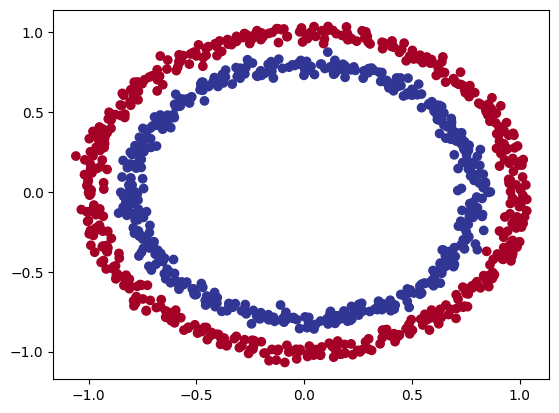

In [ ]:
# visualize visualize visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

**Note:** The data we're working iwth is often refered to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

###1.1 Check input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# view the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [ ]:
import torch
torch.__version__

'2.8.0+cu126'

In [ ]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
# split data into training and test ssets
from sklearn.model_selection import train_test_split



X_train,  X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

## 2. Building a model
Let's build a model to classify our blue and red dots.

To do so, we want to:
1. setup device agnostic code so our code will run on an accelerator gpu if there is one
2. construct a mdoel by subclassing nn.Module
3. define a loss function and optimizer
4. create a training and test loop

In [ ]:
# import pytorch
import torch
from torch import nn

# make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Now we've setup device agnotic code, let's create a model that:

1. Subclasses nn.Module alsmost all models in pytorch subclass nn.Modlue
2. Create 2 nn.Linear() layers that are capable of handling the shapes of our data
3. Defines a forward() method that outlines that forward pass or forward computation of the model
4. Instatiate an instance of our model clas and send it to the target device


In [ ]:
X_train.shape

torch.Size([800, 2])

In [ ]:
# 1. construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single feature ()
    # self.two_linear_layers = nn.Sequential(
    #   nn.Linear(in_features=2, out_features=5),
    #   nn.Linear(in_features=5, out_features=1) )
  # 3. define a forward() method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output
    # return two_linear_layers(x)
  # 4. instantiate an instance of our model class and send it to the target device




In [ ]:
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
device

'cpu'

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
# let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5743, -0.5063],
                      [-0.2880, -0.5904],
                      [-0.0227, -0.4741],
                      [-0.5556, -0.4794],
                      [ 0.6383, -0.5559]])),
             ('0.bias', tensor([-0.6509, -0.5545,  0.6052,  0.6365, -0.6828])),
             ('1.weight',
              tensor([[ 0.2549, -0.1581,  0.2340,  0.1492,  0.3417]])),
             ('1.bias', tensor([-0.1471]))])

In [ ]:
# make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Lenght of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions: \n{untrained_preds[:10]}")
print(f"\nFirst 10 labels: \n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Lenght of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions: 
tensor([[-0.5116],
        [-0.6135],
        [-0.1141],
        [-0.6248],
        [ 0.0931],
        [ 0.0293],
        [-0.4216],
        [-0.2706],
        [-0.1235],
        [-0.6180]])

First 10 labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 SEtup loss function and optimizer
Which loss function or optimizer should you use?

For example for regression you might want MAE or MSE (mean absolute error, mean squired error)

For classification you might want binary cross entropy or categorical cross entropy.


As a reminder, the loss function measures how *wrong* your models predictions are.

And for optimizers, two of the most common and useful are SGD and Adam, however pytorch has many build-in options

* For the loss function we're going to use 'torch.nn.BECWithLogitsLoss()', for more on what binary cross entropy (BCE).




In [ ]:
# setup the loss function
# loss_fn = nn.BCELoss # this requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


In [ ]:
# calucate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))* 100
  return acc





## 3. Train model
To train a model, you have to build training loop:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward(backpropagation)
5. Optimizer step (gradient descent)


### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert these logits into prediction probs by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification)

Then we can convert our model's prediction probabs to prediction labels by either rounding them or taking the 'argmax()'

In [ ]:
# view the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():

  y_logits = model_0(X_test.to(device))
y_logits[:5]

tensor([[-0.5116],
        [-0.6135],
        [-0.1141],
        [-0.6248],
        [ 0.0931]])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs[:5]

tensor([[0.3748],
        [0.3513],
        [0.4715],
        [0.3487],
        [0.5233]])

For our prediction probability values, we need to perform a range-style rounding on them:

* 'y_pred_probs' >= 0.5 'y=1' class 1
* 'y_pred_probs' < 0.5 'y=0' class 0


In [ ]:
# find the predicted labels
y_preds = torch.round(y_pred_probs)

# in full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))))

# check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

tensor([0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
        0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
        0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
        1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
        1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0.])

In [ ]:

torch.manual_seed(42)
# set the number of epochs
EPOCHS = 1000

# put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
# building training and evaluation loop
for epoch in range(EPOCHS):
  ### training
  model_0.train()
  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits to pred probs to pred labels
  # 2. Calculate the loss/accuracy
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true = y_train, # BCEWithLogitsLoass expects raw logits as input
                 y_pred = y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()
  # 4. Loss backward
  loss.backward()
  # 5. Optimizer step grandient descent
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)

    test_acc = accuracy_fn(y_true = y_test,
                        y_pred = test_pred)
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}%, | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.70950 | Acc: 46.75%, | Test loss: 0.69951, Test acc: 49.50%
Epoch: 100 | Loss: 0.69364 | Acc: 51.00%, | Test loss: 0.69305, Test acc: 48.00%
Epoch: 200 | Loss: 0.69307 | Acc: 50.88%, | Test loss: 0.69421, Test acc: 48.50%
Epoch: 300 | Loss: 0.69299 | Acc: 50.88%, | Test loss: 0.69453, Test acc: 46.50%
Epoch: 400 | Loss: 0.69298 | Acc: 51.50%, | Test loss: 0.69462, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298 | Acc: 51.00%, | Test loss: 0.69466, Test acc: 45.50%
Epoch: 600 | Loss: 0.69298 | Acc: 51.38%, | Test loss: 0.69467, Test acc: 45.50%
Epoch: 700 | Loss: 0.69298 | Acc: 51.25%, | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298 | Acc: 51.12%, | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298 | Acc: 51.12%, | Test loss: 0.69468, Test acc: 46.00%


## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything...
So to inspect it let's make some predictions and make them visual:

Vis, vis, vis

To do so, we're going to import a function called 'plot_decision_boundary()'

https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py


In [ ]:
import requests
from pathlib import Path

# download helper functions from learn pytorch repo (if it's not alrady downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading Helper function")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

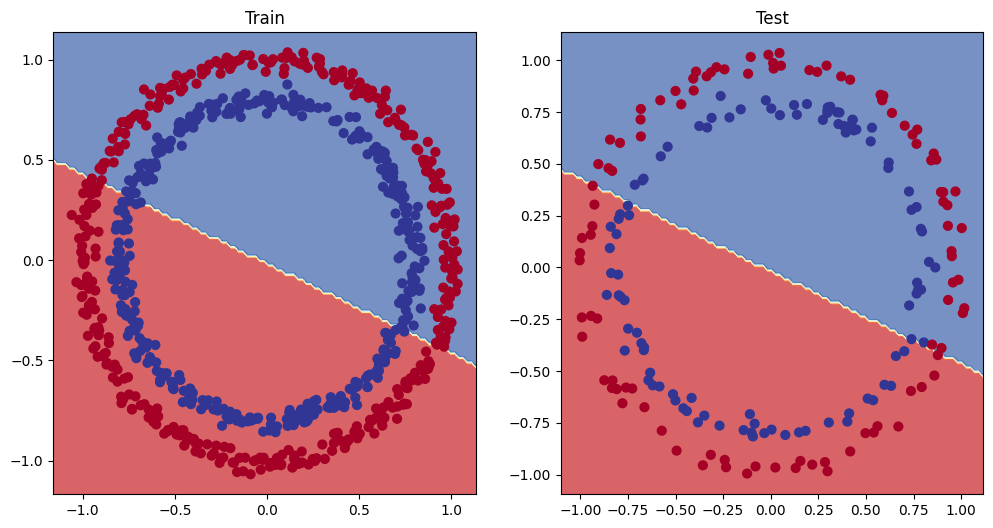

In [ ]:
# plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,
                       X_train,
                       y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,
                       X_test,
                       y_test)

## 5. Improving a model (from a model perspective)
* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function


These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we can change, they are referred as **hyperparameters**.

Let's try and improve our model by:

* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2->3
* Increase the number of epochs: 100 -> 1000



In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)


  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x))) # speed up

model_1 = CircleModelV1().to(device)
model_1



CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)


In [ ]:
# write a training and evaluation loop for model_1
torch.manual_seed(42)

epochs = 1000

# put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


for epoch in range(epochs):
  # training
  model_1.train()
  # 1. Forwared pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred prob -> prediction labels
  # 2. calculate the loss/acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred = y_pred)
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward()
  loss.backward()
  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  if epoch % 100==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, | Test Acc: {test_acc:2f}%")



Epoch: 0 | Loss: 0.69396, | Acc: 50.88% | Test Loss: 0.69261, | Test Acc: 51.000000%
Epoch: 100 | Loss: 0.69369, | Acc: 50.25% | Test Loss: 0.69269, | Test Acc: 50.000000%
Epoch: 200 | Loss: 0.69351, | Acc: 50.12% | Test Loss: 0.69282, | Test Acc: 49.500000%
Epoch: 300 | Loss: 0.69339, | Acc: 50.50% | Test Loss: 0.69295, | Test Acc: 49.000000%
Epoch: 400 | Loss: 0.69329, | Acc: 50.38% | Test Loss: 0.69309, | Test Acc: 48.500000%
Epoch: 500 | Loss: 0.69322, | Acc: 49.88% | Test Loss: 0.69322, | Test Acc: 49.500000%
Epoch: 600 | Loss: 0.69317, | Acc: 49.50% | Test Loss: 0.69335, | Test Acc: 53.000000%
Epoch: 700 | Loss: 0.69313, | Acc: 49.38% | Test Loss: 0.69347, | Test Acc: 50.500000%
Epoch: 800 | Loss: 0.69309, | Acc: 50.00% | Test Loss: 0.69358, | Test Acc: 51.000000%
Epoch: 900 | Loss: 0.69307, | Acc: 50.62% | Test Loss: 0.69368, | Test Acc: 47.500000%


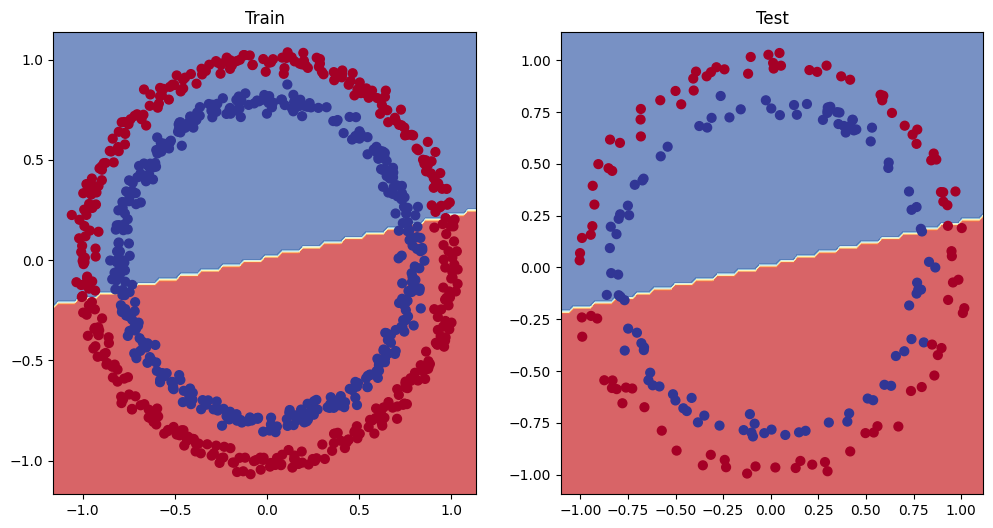

In [ ]:
# plot the decision boundry
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 preparing data to see if our model can fit a straight line
One way to troubleshoot to a larger problem is to test out a smaller problem

In [ ]:
weight = 0.7
bias = 0.3
start = 0
end= 1
step = 0.01

# create data
X_reg = torch.arange(start, end, step).unsqueeze(dim=1)
y_reg = weight * X_reg + bias

# check the data
print(len(X_reg))
X_reg[:5], y_reg[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# create train and test splits
train_split = int(0.8* len(X_reg))
X_train_reg, y_train_reg = X_reg[:train_split], y_reg[:train_split]
X_test_reg, y_test_reg = X_reg[train_split:], y_reg[train_split:]

len(X_train_reg), len(y_train_reg), len(X_test_reg), len(y_test_reg)

(80, 80, 20, 20)

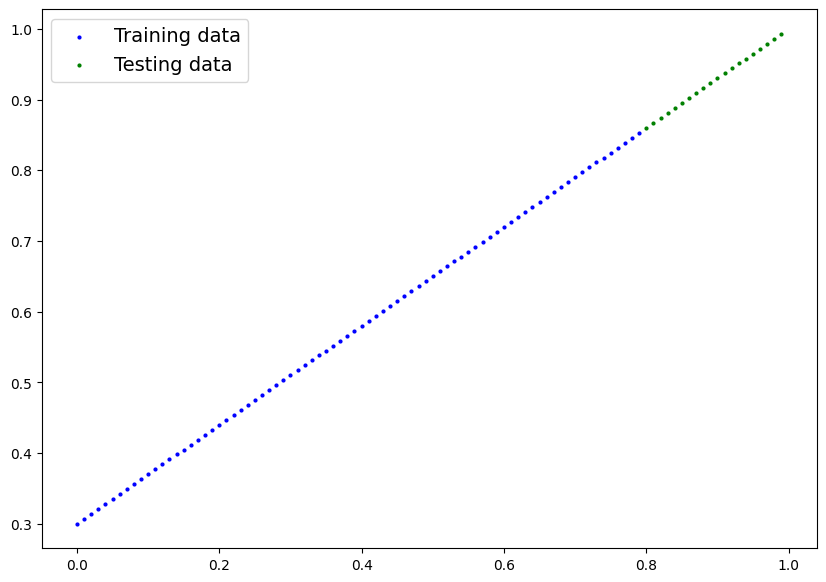

In [ ]:
plot_predictions(train_data=X_train_reg,
                 train_labels=y_train_reg,
                 test_data = X_test_reg,
                 test_labels = y_test_reg

                 )

### 5.2 adjusting model_1 to fit a straight line


In [ ]:
# same architecture as model_1 but using nn.Sequential()

model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10, bias=True),
    nn.Linear(in_features=10, out_features=10, bias=True),
    nn.Linear(in_features=10, out_features=1, bias=True)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and optim
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [ ]:
# train data
torch.manual_seed(42)

# set the epoch
epochs = 1000

# put the data on the target device
X_train_reg = X_train_reg.to(device)
X_test_reg = X_test_reg.to(device)
y_train_reg = y_train_reg.to(device)
y_test_reg = y_test_reg.to(device)

for epoch in range(epochs):
  ### training
  model_2.train()

  # 1. Forward pass
  y_pred = model_2(X_train_reg)

  # 2. Calculate the loss/acc
  loss = loss_fn(y_pred, y_train_reg)
  # 3. Set zero
  optimizer.zero_grad()

  # 4. backward (back propagation)
  loss.backward()

  # 5. Step
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    # 1. forward pass
    test_pred = model_2(X_test_reg)

    # 2. calculate the loss
    test_loss = loss_fn(test_logits, y_test_reg)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch}, | Loss: {loss:.5f}, | Test loss: {test_loss:.5f}, ")


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:129: UserWarning: Using a target size (torch.Size([20, 1])) that is different to the input size (torch.Size([200])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch: 0, | Loss: 0.75986, | Test loss: 0.92501, 
Epoch: 100, | Loss: 0.02858, | Test loss: 0.92501, 
Epoch: 200, | Loss: 0.02533, | Test loss: 0.92501, 
Epoch: 300, | Loss: 0.02137, | Test loss: 0.92501, 
Epoch: 400, | Loss: 0.01964, | Test loss: 0.92501, 
Epoch: 500, | Loss: 0.01940, | Test loss: 0.92501, 
Epoch: 600, | Loss: 0.01903, | Test loss: 0.92501, 
Epoch: 700, | Loss: 0.01878, | Test loss: 0.92501, 
Epoch: 800, | Loss: 0.01840, | Test loss: 0.92501, 
Epoch: 900, | Loss: 0.01798, | Test loss: 0.92501, 


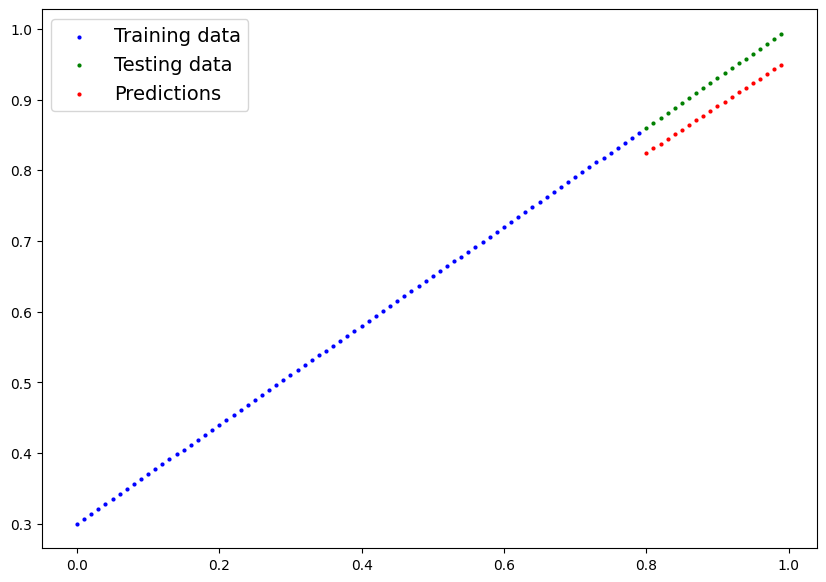

In [ ]:

model_2.eval()

with torch.inference_mode():
  y_preds = model_2(X_test_reg)


plot_predictions(train_data=X_train_reg,
                 train_labels=y_train_reg,
                 test_data = X_test_reg,
                 test_labels = y_test_reg,
                 predictions = y_preds)

## 6. The missing piece: non-linearity

"What patterns could you draw if you were given an infinite amound of a straight and non-straigh lines?"

Or in machine learning terms, and infinite but really it is finite of linear and non-linear functions?

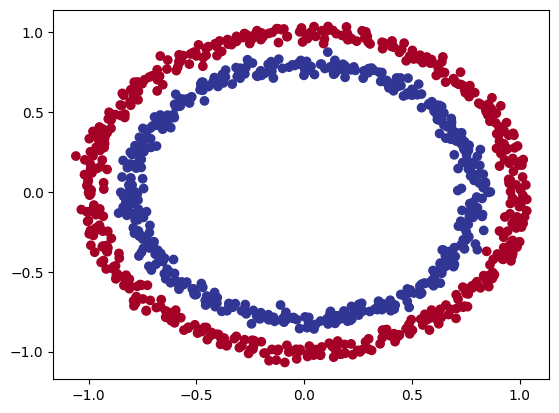

In [ ]:
### 6.1 Recreating non-linear data (red and blue circles)

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=n_samples,
                    noise = 0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);


In [ ]:
# convert data to tensors and then trian and test again
import torch
from sklearn.model_selection import train_test_split

# turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y[:5]


(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 1., 1., 1., 0.]))

### 6.2 Building a model with non-linearity
* Linear is straight lines
* Non-linear is non-straight lines

Artificial neural networks are a large combination of linear and non-linear functions with are potentially able to find patterns in data.

In [ ]:
# build a model with non-linear acitivations
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=10)
    self.layer_4 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    # where should we put our non=linear activation functions?
    return self.layer_4(self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=10, bias=True)
  (layer_4): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# setup loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

### 6.3 Training a model with non-linearity

In [ ]:
len(X_test), len(y_test)

(200, 200)

In [ ]:
# random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 2000

for epoch in range(epochs):
  ### training
  model_3.train()

  # 1. forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. calculate the loss/acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred= y_pred)

  # 3. optimize the zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. step the optimizer
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    # forward pass
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # calculate the loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred = test_pred)
  if epoch%100==0:
    print(f"Epoch {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, | Test acc: {test_acc:.2f}%")

Epoch 0 | Loss: 0.69815 | Acc: 50.00% | Test loss: 0.69751, | Test acc: 50.00%
Epoch 100 | Loss: 0.69235 | Acc: 52.75% | Test loss: 0.69194, | Test acc: 52.50%
Epoch 200 | Loss: 0.69199 | Acc: 52.25% | Test loss: 0.69148, | Test acc: 53.00%
Epoch 300 | Loss: 0.69152 | Acc: 52.38% | Test loss: 0.69089, | Test acc: 53.00%
Epoch 400 | Loss: 0.69083 | Acc: 52.50% | Test loss: 0.69005, | Test acc: 53.50%
Epoch 500 | Loss: 0.68983 | Acc: 52.75% | Test loss: 0.68883, | Test acc: 54.00%
Epoch 600 | Loss: 0.68845 | Acc: 53.62% | Test loss: 0.68718, | Test acc: 53.50%
Epoch 700 | Loss: 0.68673 | Acc: 53.75% | Test loss: 0.68506, | Test acc: 53.50%
Epoch 800 | Loss: 0.68448 | Acc: 54.25% | Test loss: 0.68231, | Test acc: 54.00%
Epoch 900 | Loss: 0.68150 | Acc: 54.75% | Test loss: 0.67857, | Test acc: 54.00%
Epoch 1000 | Loss: 0.67715 | Acc: 56.00% | Test loss: 0.67315, | Test acc: 56.50%
Epoch 1100 | Loss: 0.67034 | Acc: 59.13% | Test loss: 0.66507, | Test acc: 60.50%
Epoch 1200 | Loss: 0.65785 |

### 6.4 Evaluating a model trained with non-linear activation functions

In [ ]:
# make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

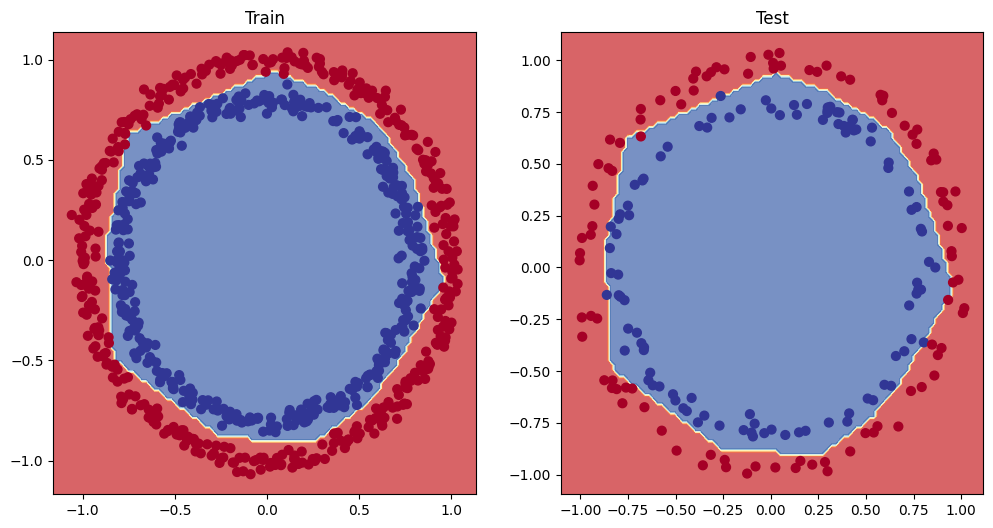

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replicating non-linear activation functions
Neural networks rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own.

And these tools are linear & non-linear functions

In [ ]:
# create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

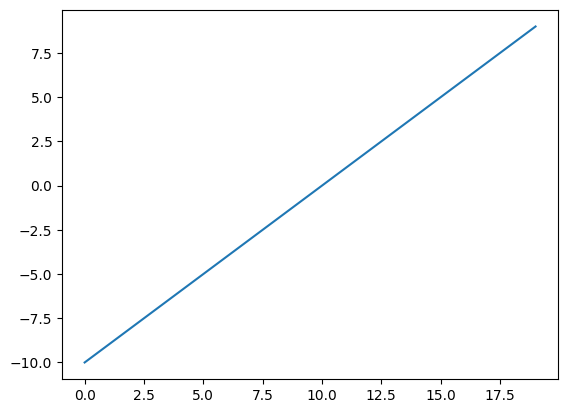

In [ ]:
# visualize the tensor
plt.plot(A)

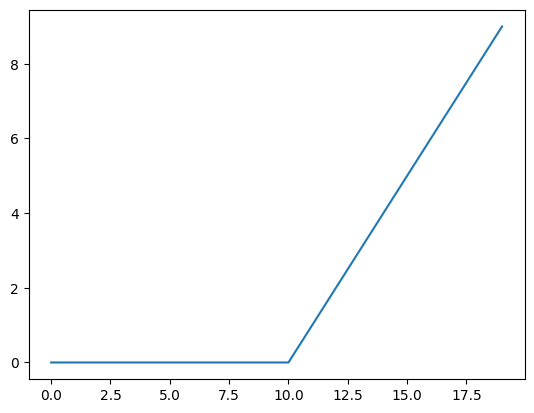

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

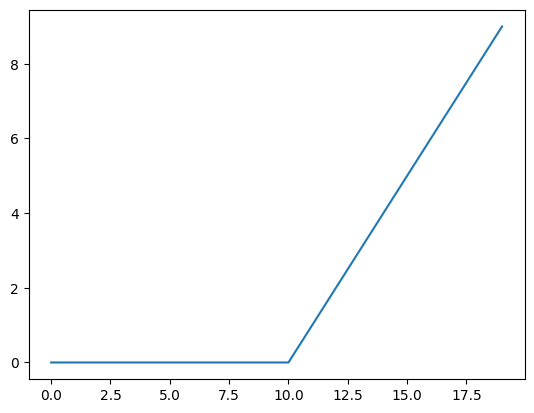

In [ ]:
plt.plot(relu(A))

In [ ]:
def sigmoid(x: torch.Tensor) -> torch.Tensor:
  return 1/(1+torch.exp(-x))


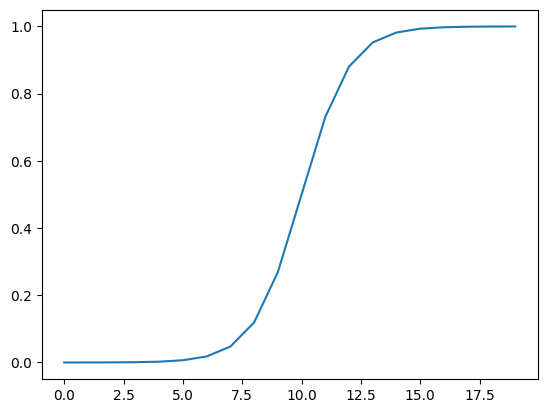

In [ ]:
plt.plot(sigmoid(A))

## 8. Putting it all together with a multi-class classification problem

* Binary classification = one thing or another
* Multi-class classification = more than one thing or another


### 8.1 Creating a toy multi-class dataset

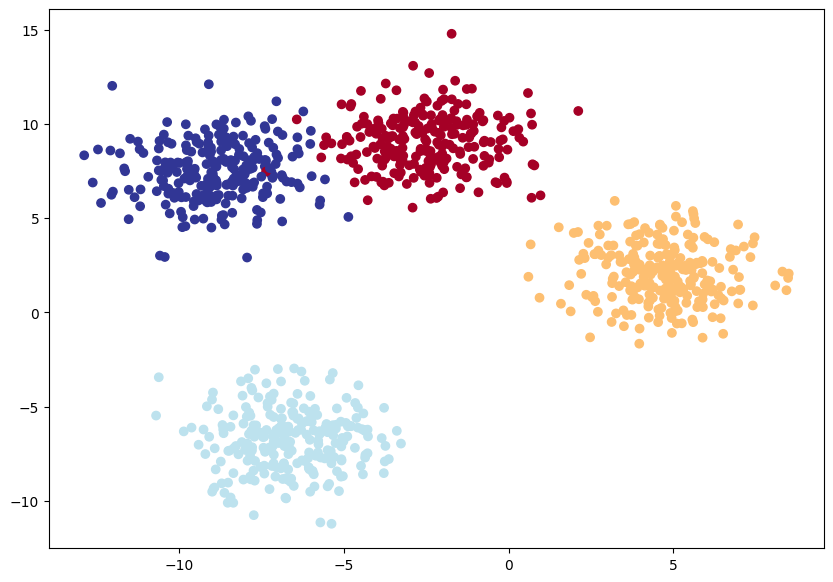

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. create multi class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # give the clusters a little shake up,
                            random_state=RANDOM_SEED
                            )
# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
# 3. Split into train adn test
X_blob_train, X_blob_test, y_blob_trian, y_blob_test = train_test_split(X_blob,

                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4. Plot the data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

### 8.2 Building a multi class classification model

In [ ]:
# create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
# build a model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """
    Initialize multi-class classification model.
    Args:
      input_features (int) : Number of input features to the model
      output_features (int) : Number of outpur features to the model
      hidden_units (int): Number of hidden units between layers, default 8
    Returns:
    Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_features)

    )
  def forward(self, x):
    return self.linear_layer_stack(x)

# create an instance of blobmodel and send it to the target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Setup a loss and optimizer

In [ ]:
# create loss function and optimizer - loss function measures how wrong our model's predictions are
loss_fn = nn.CrossEntropyLoss()
# create an optimizer for multi-class classification - optimizer updates our model parameters to try and reduce the loss
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.01)

### 8.4 Getting prediction probabilities for a multi-class Pytorch model


In order to evaluate and train and test our model, we need to convert our model's outputs logits to predication probabilities and then to prediction labels.

Logits (raw output of the model)-> Pred probs (use torch.softmax)-> Pred labels (take the argmax of the prediction probabilities)

In [ ]:
# let's get some raw outputs of our model (logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)
y_logits[:5]


tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]])

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
# convert our model's logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]])
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]])


In [ ]:
torch.sum(y_pred_probs[0])

tensor(1.)

In [ ]:
# Convert our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3])

### 8.5 Creating training loop and testing loop for a multi class pytorch model


In [ ]:
# set the random seed
torch.manual_seed(RANDOM_SEED)
# set the epoch
epochs = 100

# put data to the target device
X_blob_train, y_blob_trian = X_blob_train.to(device), y_blob_trian.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# loop through data
for epoch in range(epochs):
  ### training
  model_4.train()

  # 1. Forward pass
  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_blob_trian)
  acc = accuracy_fn(y_true=y_blob_trian,
                    y_pred= y_pred)

  # 3. Optimize zero grad
  optimizer.zero_grad

  # 4. Loss the backward
  loss.backward()

  # 5. Step step
  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    # forward pass
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    # calculate the loss
    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_pred)
  if epoch%10==0:
    print(f"Epoch: {epoch}, | Loss: {loss:.5f}, | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}")



Epoch: 0, | Loss: 1.04324, | Acc: 65.50% | Test loss: 0.96335 | Test acc: 71.00
Epoch: 10, | Loss: 0.16582, | Acc: 98.75% | Test loss: 0.12852 | Test acc: 99.00
Epoch: 20, | Loss: 0.03128, | Acc: 99.12% | Test loss: 0.01752 | Test acc: 99.50
Epoch: 30, | Loss: 0.03603, | Acc: 99.12% | Test loss: 0.01138 | Test acc: 99.50
Epoch: 40, | Loss: 0.05988, | Acc: 99.00% | Test loss: 0.02096 | Test acc: 99.50
Epoch: 50, | Loss: 0.08994, | Acc: 99.12% | Test loss: 0.02410 | Test acc: 99.50
Epoch: 60, | Loss: 0.11933, | Acc: 99.25% | Test loss: 0.06648 | Test acc: 99.50
Epoch: 70, | Loss: 0.16196, | Acc: 99.12% | Test loss: 0.00061 | Test acc: 100.00
Epoch: 80, | Loss: 0.18270, | Acc: 99.25% | Test loss: 0.10148 | Test acc: 99.50
Epoch: 90, | Loss: 0.17403, | Acc: 99.12% | Test loss: 0.10430 | Test acc: 99.50


### 8.6 Making and evaluating predictions with a pytorch multi-class model

In [ ]:
# model prediction
model_4.eval()

with torch.inference_mode():
  y_logits = model_4(X_blob_test)


y_logits[:10]


tensor([[ 153.5781,  330.2560, -397.6468,  -96.4410],
        [ 177.7764, -250.5406, -209.5899,  287.0775],
        [-243.5311, -428.4608,  597.0087,   90.4349],
        [  54.0318,  222.8455, -181.1391, -101.7322],
        [ 301.0910,  194.6928, -601.5955,   97.0220],
        [ 200.0779, -319.6288, -221.1526,  346.9301],
        [-258.4619, -350.5870,  592.2100,   30.4497],
        [ 260.9984,   74.4731, -483.8755,  143.3604],
        [-244.2900, -566.9421,  653.2533,  177.0949],
        [ 270.6591,  116.6937, -517.4969,  123.8483]])

In [ ]:
# go from logits -> prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.]])

In [ ]:
# go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

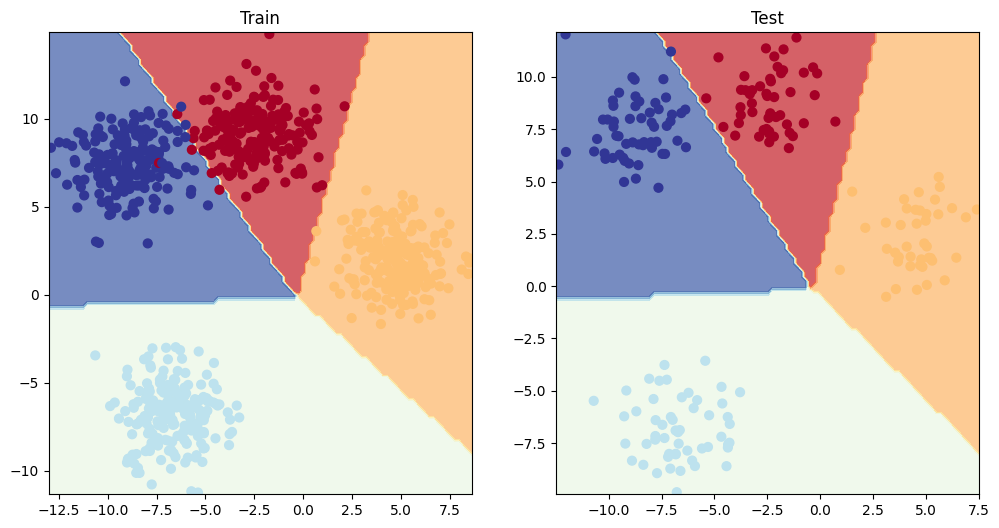

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_trian)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. A few more classification metrics..
* Accuracy - out of 100 samples, how many does our model get right?
* Precision - w
* Recall
* F1-score
* Confusion matrix
* Classification report

See this for when to use precision/recall - https://medium.com/data-science/beyond-accuracy-precision-and-recall-3da06bea9f6c

If you want access to a lot of Pytorch metrics, see TorchMetrics - https://docs.pytorch.org/docs/stable/elastic/metrics.html


In [ ]:
from torchmetrics import Accuracy

In [ ]:
# setup metric
torchmetric_acc = Accuracy(task="multiclass", num_classes=4)

# calculate accuracy
torchmetric_acc(y_preds, y_blob_test)

tensor(0.9950)